Objetivos del taller:
*** Mejorar estrategía de ocupación y se basa en 3 frentes:
Una vez que un cliente realiza una reserva, entender los factores que determinan la duración de la
estadía, la probabilidad de cancelación y la influencia de características como el tipo de
hotel, la composición del grupo de huéspedes o el canal de reservación es vital para el
éxito del negocio ***
  
El dataset suministrado contiene alrededor de 32 columnas y 58895 filas. Contiene información relacionada al servicio de hospedaje ofrecido por un hotel o un resort. Asimismo, contiene informacion del estado y fecha de la reserva, el pais, las personas que se alojaron, el tipo de plan escogido por el usuario, la compañia encargada del pago o de realizar la reserva, si la reserva fue cancelada, entre otros.
Los tipos de datos encontrados en el dataset son: text, boolean, integer, numeric y date.
A continuación se presenta el top 5 atributos elegidos:
* hotel                   (Cualitativa nominal):,
* reservation_status      (Cualitativa nominal),
* deposit_type            (Cualitativa nominal),
* is_Canceled             (Cualitativa nominal),
* lead_time               (cuantitativa discreta)




## Carga y limpieza de datos

In [ ]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
reservation_df = pd.read_csv("data/hotel_bookings_modified.csv")

C:\Users\Diego\AppData\Local\Temp\ipykernel_19780\34777500.py:1: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  reservation_df = pd.read_csv("data/hotel_bookings_modified.csv")


In [ ]:
#reservation_df.sample(3)
#reservation_df.dtypes
# Showing dataframe dimensions
reservation_df.shape

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
29173,Resort Hotel,0,386,2016.0,October,43,20,0,3,2,...,NaN,NaN,0.0,Transient-Party,60.0,0.0,1.0,Check-Out,2016-10-23,NaN
48914,City Hotel,1,66,20016.0,April,14,2,1,1,1,...,9.0,NaN,0.0,Transient,88.2,0.0,0.0,Canceled,2016-02-21,NaN
7045,Resort Hotel,1,6,2016.0,July,30,18,1,0,1,...,NaN,53.0,0.0,Transient,126.0,0.0,0.0,Canceled,2016-07-14,NaN


In [ ]:
# Lista de columnas a castear según lo indica el Diccionario de Datos
cast_columns_int = ["arrival_date_year","children","days_in_waiting_list","required_car_parking_spaces","total_of_special_requests","agent","company"]
cast_columns_date = ["reservation_status_date"]


In [ ]:
# transformación columnas enteras
def convertir_string(cast_columns_int,df):
    for i in cast_columns_int:
        df[i]=(
        pd.to_numeric(df[i], errors="coerce")
          .round()
          .astype("Int64")
        )
# transformación columnas fecha
def convertir_date(cast_columns_date,df):
    for i in cast_columns_date:
        df[i]=(
        pd.to_datetime(df[i], errors="coerce")
        )

# limpieza columnas tipo "object" 
def eliminar_espacios(columns_object,df):
    df[columns_object]=df[columns_object].apply(lambda x: x.str.strip())


convertir_string(cast_columns_int,reservation_df)
convertir_date(cast_columns_date,reservation_df)
#obtiene lista de columnas tipo "object"
columns_object = reservation_df.select_dtypes(include="object").columns
eliminar_espacios(columns_object,reservation_df)

In [ ]:
#se eliminan duplicados
df_reservation_mod = reservation_df.drop_duplicates()

## Univariable Cualitative Analysis

#### Variable hotel

In [203]:
# obtencion de valores unicos, el valor mas repetido y su frecuencia
reservation_df["hotel"].describe()

count            58895
unique               2
top       Resort Hotel
freq             40063
Name: hotel, dtype: object

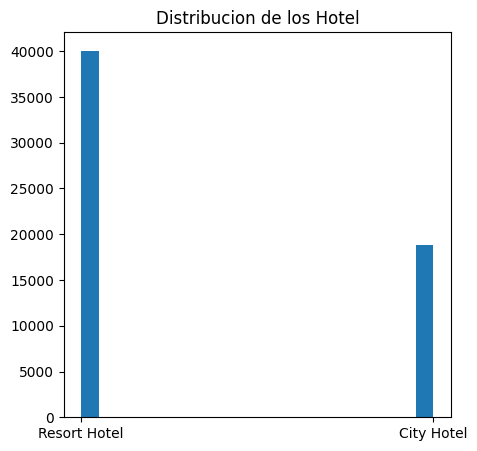

In [204]:
# Calculating the relative frecuency of accommodations offered
reservation_df["hotel"].value_counts(dropna=False, normalize=True)

# Plotting a histogram for price
plt.figure(figsize=(5, 5))                     
plt.hist(reservation_df["hotel"], bins=20)      
plt.title("Distribucion de los Hotel")
plt.show()

El 68% de los datos de corresponden Resort Hotel. El 32 % a City hotel. Se puede deber a mayor demanda en el primero o la existencia de mas datos. Mas adelante lo vamos a descubrir.

#### Variable reservation_status

Cerca del 58% de las reservas son tomadas exitosamente. Hay un 39% de reservas que son canceladas, por lo que es importante analizar que factores conducieron a la cancelación por parte del cliente y que oportunidades de mejora se pueden aplicar en la estrategia de alojamiento del cliente. Finalmente, cerca del 1% de alojamientos no se hizo el check-in y el cliente informo el motivo. Se se tuviera la información relacionada al motivo, se podría analizar si esos motivos relacionan al servicio de hospedaje, pero como no se tiene, se plantea como un futuro análisis.

In [205]:
# obtain unique values, count, most repeat value
reservation_df["reservation_status"].describe()
# Calculating the relative frecuency of accommodations offered
reservation_df["reservation_status"].value_counts(dropna=False, normalize=True)

reservation_status
Check-Out    0.582240
Canceled     0.394227
No-Show      0.013533
NaN          0.010001
Name: proportion, dtype: float64

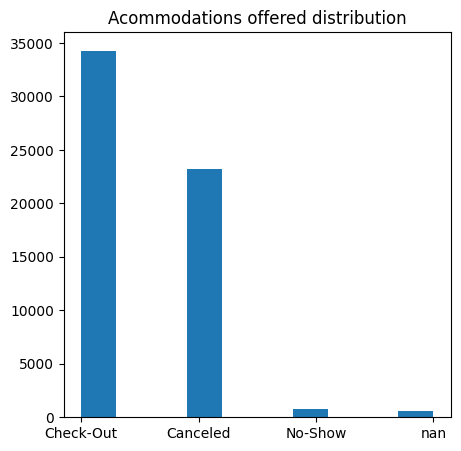

In [206]:


# Plotting a histogram for price
plt.figure(figsize=(5, 5))                     
plt.hist(reservation_df["reservation_status"].astype(str), bins=10)      
plt.title("Acommodations offered distribution")
plt.show()


#### Variable deposit_type

In [207]:
# obtain unique values, count, most repeat value
reservation_df["deposit_type"].describe()

count          58895
unique             3
top       No Deposit
freq           52333
Name: deposit_type, dtype: object

In [208]:
# Calculating the relative frecuency of accommodations offered
reservation_df["deposit_type"].value_counts(dropna=False, normalize=True)

deposit_type
No Deposit    0.888581
Non Refund    0.108991
Refundable    0.002428
Name: proportion, dtype: float64

Se observa que en la columna "deposit_type" existe un problema de calidad de datos basado en columna relacionado a la existencia de sinónimo (Non Refund = No Refund). Se procede a solucionarlo y calcular nuevamente el conteo de valores dentro de la columna

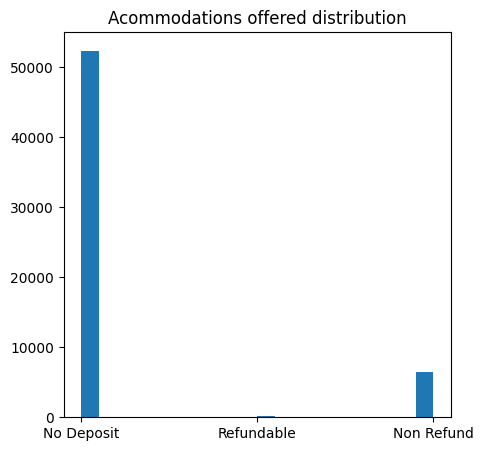

In [209]:
# Calculating the relative frecuency of accommodations offered
reservation_df["deposit_type"].replace("No Refund","Non Refund",inplace=True)
reservation_df["deposit_type"].value_counts(dropna=False, normalize=True)

# Plotting a histogram for price
plt.figure(figsize=(5, 5))                     
plt.hist(reservation_df["deposit_type"], bins=20)      
plt.title("Acommodations offered distribution")
plt.show()

Cerca del 88% de los clientes no hacen un depositivo para realizar una reserva. El 10% de los clientes hacen el depositivo del 100%, pero no se devuelve si cancela. Y muy pocos clientes hacen un depositivo por un valor por debajo del costo de la reserva.

### Variable is_canceled

In [210]:
# obtain unique values, count, most repeat value
reservation_df["is_canceled"].describe()

count    58895.000000
mean         0.411393
std          0.492090
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_canceled, dtype: float64

In [211]:
# Calculating the relative frecuency of accommodations offered
reservation_df["is_canceled"].value_counts(dropna=False, normalize=True)

is_canceled
0    0.588607
1    0.411393
Name: proportion, dtype: float64

Cerca del 58% de las reservas no fueron canceladas. En cambio, cerca del 42% de las reservas fueron canceladas. Esta valor tan alto de cancelación indica que hay una opción de mejora notoría en la estrategia de ocupación.

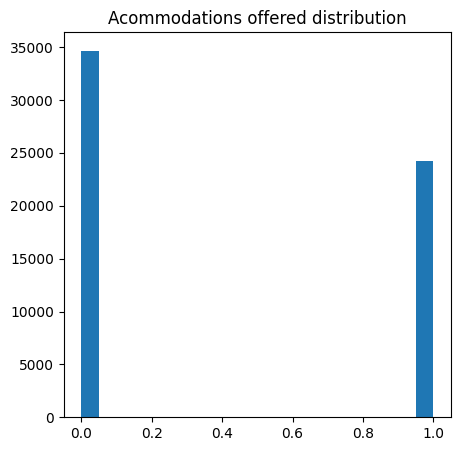

In [212]:
# Plotting a histogram for price
plt.figure(figsize=(5, 5))                     
plt.hist(reservation_df["is_canceled"], bins=20)      
plt.title("Acommodations offered distribution")
plt.show()

## Univariable Cuantitative Analysis

#### Variable lead_time

In [223]:
# obtain unique mean, std, cuantiles,max value
reservation_df["lead_time"].describe()

count    58895.000000
mean       100.050904
std        101.162420
min          0.000000
25%         17.000000
50%         69.000000
75%        157.000000
max        737.000000
Name: lead_time, dtype: float64

Mean = 100 → en promedio los alojamientos se reservan con 100 dias de anticipación (mas de 3 meses de anticipación)
- Q1 (25%) = 17          → El 25% de los alojamientos se reservan con 17 dias de antelación
- Q2 (50%, mediana) = 69 → El 50% de los alojamientos se reservan con 69 dias de antelación
- Q3 (75%) = 157         → El 75% de los alojamientos se reservan con 157 dias de antelación o menos

📌 Rango intercuartílico (IQR):
- IQR= Q3 - Q1 = 140
- Límite inferior = Q1 - 1.5 × IQR = 17- 1.5*140  = 0    
- Límite superior = Q3 + 1.5 × IQR = 157+1.5*140  = 367

👉 Entonces, alojamientos que son reservados con una antelacion ≥ 367 dias, se consideran valores atipicos

[]

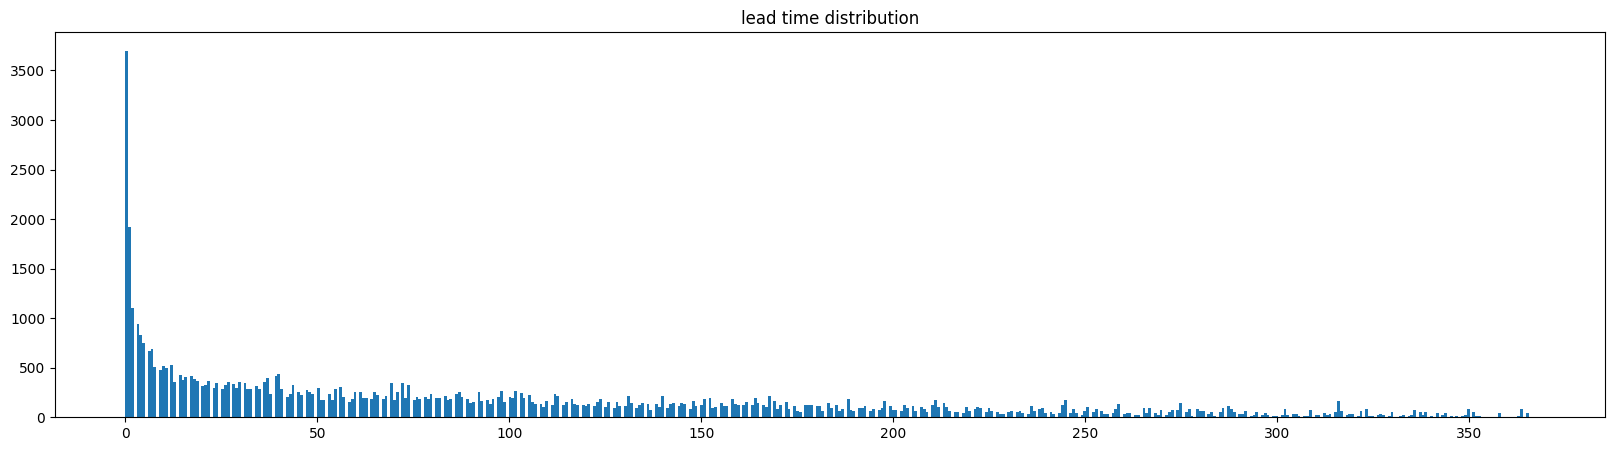

In [224]:

# Calculating the relative frecuency of lead times
q1=reservation_df["lead_time"].quantile(0.25)
q3=reservation_df["lead_time"].quantile(0.75)
iqr=q3-q1
plt.figure(figsize=(20, 5))
plt.hist(reservation_df.loc[reservation_df["lead_time"] <= (q3 + 1.5 * iqr)]["lead_time"], bins=500)
plt.title("lead time distribution")
plt.plot()


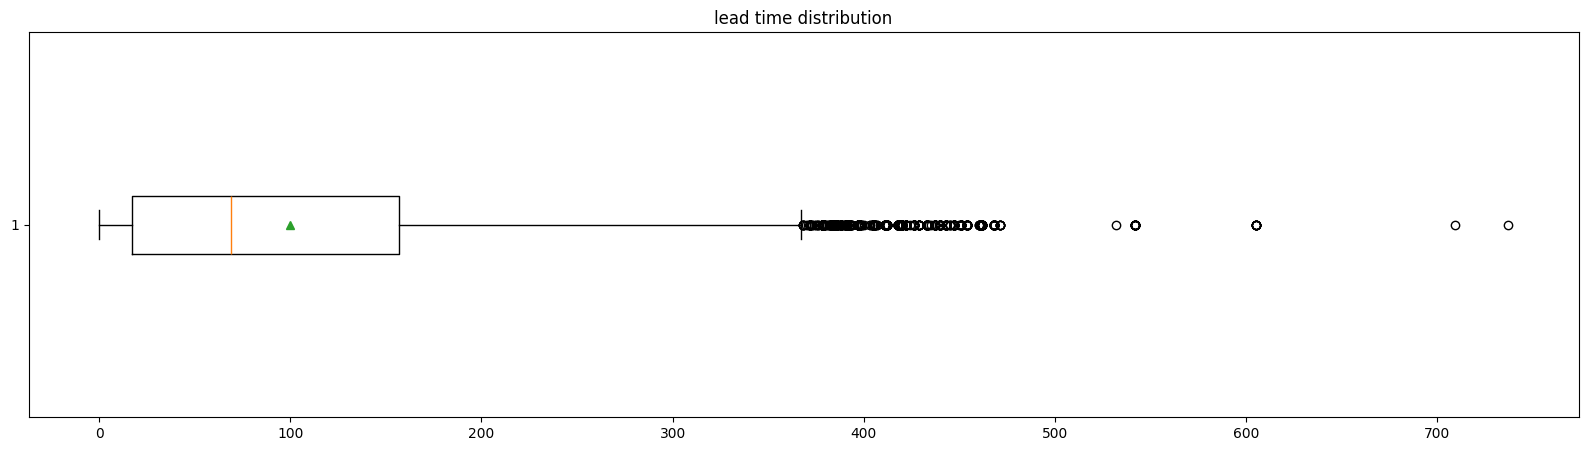

In [225]:

# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(reservation_df["lead_time"], showmeans=True, vert=False)
plt.title("lead time distribution")
plt.show()

La media (triangulo verde) que es 100 esta no tan cerca de la mediana que es 69 dias (linea naranja ), por lo que existe una ligera asimetría positiva en la distribución, causada por la presencia de valores atípicos positivos grandes que están empujando la media hacia la derecha . Asimismo, los valores atipicos empiezan por encima de los 367 dias y se extienden hasta valores muy grandes ( 700 dias). La mayoria de los dias de antelacion de reserva (rango intercuartilico  Q3 - Q1), están entre 17 y 160 dias, lo que representa el comportamiento típico de los clientes.

In [226]:
# Asimetría
skewness = reservation_df["lead_time"].skew()
# Curtosis
kurtosis = reservation_df["lead_time"].kurt()
print("Asimetría (skewness):", skewness)
print("Curtosis:", kurtosis)

Asimetría (skewness): 1.2082573004591315
Curtosis: 1.0087856167757177


Como la asimetria arroja un valor positivo mayor a 1, nos confirma que distribución esta sesgada hacia la derecha. Entonces, existen unos valores positivos muy grandes que estan arrastrando la media hacia la derecha.
También, como la curtosis es cercano a uno la variable está sesgada a la derecha y presenta una concentración central fuerte con algunos valores atípicos altos que le dan colas más pesadas.

## Perfilamiento cliente

### Analisis de clientes exitosos

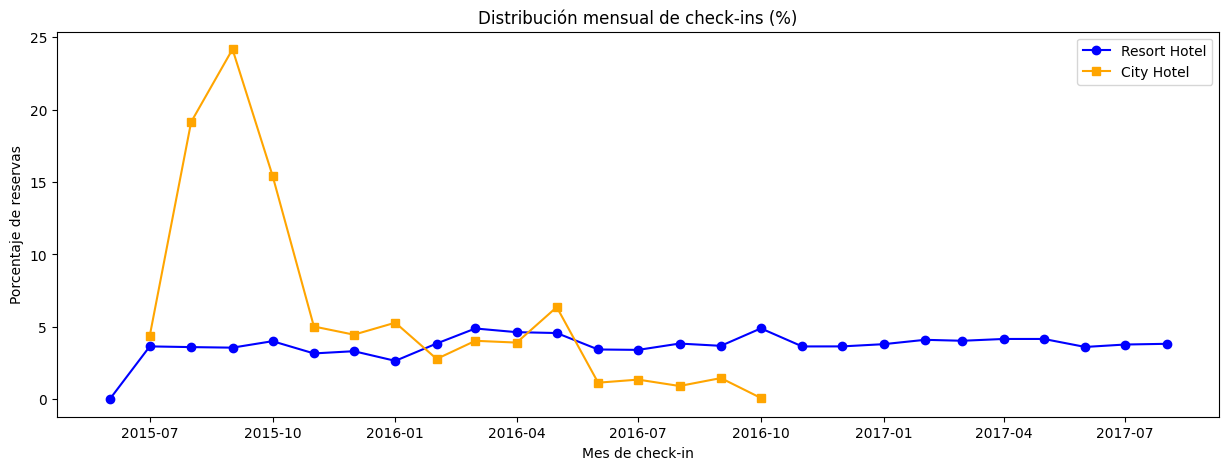

In [ ]:
# Filtrar solo huéspedes que completaron su estadía
checkout_df = reservation_df[reservation_df["reservation_status"] == "Check-Out"]
# obtiene los dias de alojamiento
checkout_df["days_of_accommodation"]=(checkout_df["stays_in_week_nights"] + checkout_df["stays_in_weekend_nights"])
# obtiene la fecha de check-in
checkout_df["date_check-in"]=checkout_df["reservation_status_date"]-pd.to_timedelta(checkout_df["days_of_accommodation"], unit="D")
# truncar la fecha del check-in al primer dia del mes para realizar analisis
checkout_df["date_check-in_truncate_month"] = checkout_df["date_check-in"].dt.to_period("M").dt.to_timestamp()
checkin_counts_resort = checkout_df[checkout_df["hotel"]=="Resort Hotel"]["date_check-in_truncate_month"].value_counts(normalize=True).sort_index() * 100
checkin_counts_hotel= checkout_df[checkout_df["hotel"]=="City Hotel"]["date_check-in_truncate_month"].value_counts(normalize=True).sort_index() * 100
plt.figure(figsize=(15,5))

# Línea para Resort Hotel
plt.plot(checkin_counts_resort.index, checkin_counts_resort.values, 
         marker="o", linestyle="-", color="blue", label="Resort Hotel")

# Línea para City Hotel
plt.plot(checkin_counts_hotel.index, checkin_counts_hotel.values, 
         marker="s", linestyle="-", color="orange", label="City Hotel")

# Personalización
plt.title("Distribución mensual de check-ins (%)")
plt.xlabel("Mes de check-in")
plt.ylabel("Porcentaje de reservas")
plt.legend()
plt.show()


Si se compara el intervalo de fecha entre julio de 2015 y octubre de 2016, se observa que en promedio "City hotel" tuvo una mayor demanda de hospedaje que "Resort Hotel".Tambien este ultimo, tuvo un pico de demanda entre agosto de 2015 y octubre de 2015. Apartir de alli, el comportamiento referente a demanda de hospedaje de los 2 hoteles estuvo similar.

In [ ]:

# Cuales son los el perfil del cliente que se hospeda en los hoteles
checkout_df[["adults","children","babies"]].value_counts(dropna=False, normalize=True)

adults  children  babies
2       0         0         0.685078
1       0         0         0.199411
2       1         0         0.029687
3       0         0         0.027442
2       2         0         0.026392
                              ...   
87      0         0         0.000029
92      0         0         0.000029
89      0         0         0.000029
93      0         0         0.000029
98      0         0         0.000029
Name: proportion, Length: 114, dtype: float64

El anterior analisis permite indicar los principales atributos del cliente que se hospedo:  
- 68% de las reservas se hicieron para unicamente 2 adultos.
- 19% de las reservas se hicieron para unicamente un adulto. 
- Cerca del 3% fue para unicamente 3 adultos. 
- Cerca del 2.6% fue para 2 adultos y 2 niños. 

In [152]:
checkout_df[["stays_in_weekend_nights","stays_in_week_nights"]].value_counts(dropna=False, normalize=True)*100

stays_in_weekend_nights  stays_in_week_nights
0                        2                       17.357223
2                        5                       10.220519
0                        3                        9.402188
                         1                        9.001637
1                        2                        7.843053
                                                   ...    
6                        16                       0.004307
8                        19                       0.004307
9                        24                       0.004307
12                       30                       0.004307
16                       40                       0.004307
Name: proportion, Length: 65, dtype: float64

El 17% de los clientes exitosos, se quedan 2 dias entre semana. Estos son los dias mas solicitados por los clientes. Enseguida, el 10 % de los clientes se quedan una semana completa (5 noches entre semana + 2 noches los fines de semana). Luego, cerca del 9 % se queda 3 dias entre semana. Asimismo, cerca tambien del 9% se queda 3 dias en la semana (2 noches entre semana y una noche los fines de semana).

In [139]:
checkout_df["reserved_room_type"].value_counts(dropna=False, normalize=True)*100

reserved_room_type
A    63.550203
D    16.876148
E    10.407979
F     2.974541
G     2.784987
C     1.767228
H     1.032341
B     0.594908
L     0.011665
Name: proportion, dtype: float64

El tipo de habitacion A es la mas solicitada por el cliente que se hospedo satisfactoriamente (cerca del 63%) y como de anteriores análisis se sabe que las el 68% de las reservas se hicieron para 2 adultos, se puede inferir que el tipo de habitacion A es para máximo 2 personas. El 16% de los clientes se hospedan en la habitacion tipo D y el 10% en el tipo E. Lo anterior nos indica que las habitaciones para maximo 2 personas son las reservadas.

In [137]:
checkout_df["customer_type"].value_counts(dropna=False, normalize=True)*100

customer_type
Transient          65.229944
Transient-Party    26.770873
Contract            6.220291
NaN                 0.982765
Group               0.796127
Name: proportion, dtype: float64

El anterior analisis nos da mas pista acerca del perfil del cliente que tuvo con exito un hospedaje. Por ejemplo, cerca del 65% del cliente hizo una reserva tipo contract (es una reserva individual, sin relación con contratos ni grupos). cerca del 26 % fue una reserva tipo Transient-party (reserva individual (transient), pero está ligada a otra reserva individual). Cerca del 6% es de tipo Contract (La reserva hace parte de un contrato o convenio entre el hotel y una empresa, agencia de viajes, aerolínea). Y menos del 1% es de tipo Group (reserva está asociada a un grupo de personas que viajan juntas)

In [138]:
checkout_df[["meal"]].value_counts(dropna=False, normalize=True)*100

meal     
BB           77.244758
HB           18.036803
Undefined     2.554606
SC            1.256890
FB            0.906944
Name: proportion, dtype: float64

El 77% de los clientes que se hospedaron selecciono un modelo de comidas BB (Bed & Breakfast), es decir, hospedaje mas desayuno. El 18% lo hizo con un modelo HB (Half board), es decir, hospedaje mas desayuno y usulamente la cena.

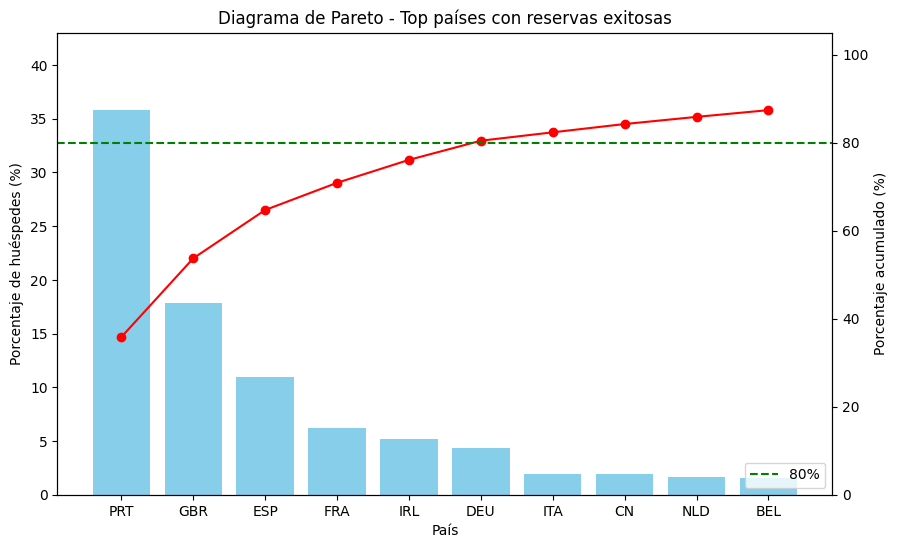

In [125]:

# --- Top países (ya normalizado en proporción con normalize=True) ---
top_countries = checkout_df["country"].value_counts(normalize=True).head(10) * 100

# Calcular acumulado
cum_values = top_countries.cumsum()

# Crear figura
fig, ax1 = plt.subplots(figsize=(10,6))

# Barras (frecuencia relativa en %)
ax1.bar(top_countries.index, top_countries.values, color="skyblue")
ax1.set_ylabel("Porcentaje de huéspedes (%)")
ax1.set_xlabel("País")
ax1.set_title("Diagrama de Pareto - Top países con reservas exitosas")
ax1.set_ylim(0, top_countries.max() * 1.2)

# Eje secundario para acumulado
ax2 = ax1.twinx()
ax2.plot(top_countries.index, cum_values.values, color="red", marker="o", linestyle="-")
ax2.set_ylabel("Porcentaje acumulado (%)")
ax2.set_ylim(0, 105)  # hasta 100%

# Línea horizontal en 80%
ax2.axhline(80, color="green", linestyle="--", label="80%")
ax2.legend(loc="lower right")

plt.show()


Segun el diagrama de Bareto, cerca del 80% del total de las reservas exitosas(punto donde se intersecta la linea roja que representa el acomulado de la cantidad de reservas por pais de origen del cliente con la linea verde que representa el 80% del total de las reservas)  provienen del top 6 de pais de origen de los clientes y son: Portugal (35.8 %), Reino Unido (17.88%), España (10.98%), Francia (6.17%), Irlanda (5%) y Alemania (4.35%). Por lo tanto, las campañas para atracción de clientes, se deben enfocar en atraer clientes de estos paises.

In [133]:
checkout_df["is_repeated_guest"].value_counts(dropna=False, normalize=True)*100

is_repeated_guest
0    95.199907
1     4.800093
Name: proportion, dtype: float64

Los clientes que se hospedaron de forma satisfactoria, en su mayoría son nuevos (cerca del 95) y solo el 4% eran clientes antiguos. Existe una gran oportunidad para mejorar la politica de retención de clientes, y seguir fortaleciendo la politica de atracción de nuevos clientes.

In [136]:
checkout_df["company"].value_counts(dropna=False, normalize=True)*100

company
<NA>    91.796681
223      1.907206
154      0.367443
281      0.349946
405      0.236214
          ...    
67       0.002916
65       0.002916
91       0.002916
8        0.002916
221      0.002916
Name: proportion, Length: 231, dtype: Float64

No se tiene información que indique la compañia o entidad donde fue realizada la reserva o fue la responsable del pago de la misma, lo que causa que no se pueda analizar que compañias son las que mas direccionan clientes en los hoteles.

### Analisis de clientes con reservas canceladas

C:\Users\Diego\AppData\Local\Temp\ipykernel_19780\827879376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canceled_df["date_canceled_truncate_month"] = canceled_df["reservation_status_date"].dt.to_period("M").dt.to_timestamp()


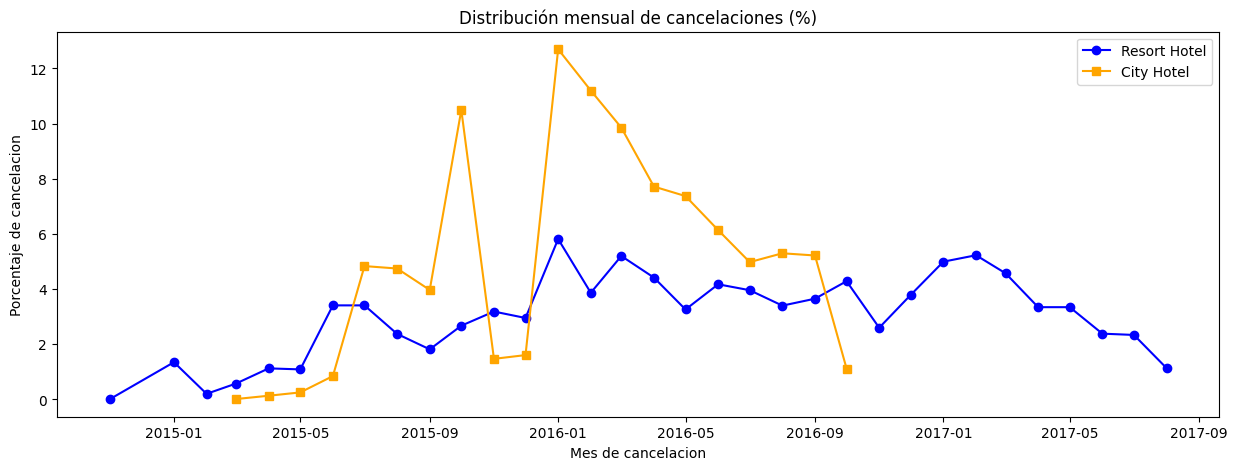

In [222]:
# Filtrar solo huéspedes que cancelaron su estadía
canceled_df = reservation_df[reservation_df["reservation_status"] == "Canceled"]

# truncar la fecha del cancelamiento al primer dia del mes para realizar analisis
canceled_df["date_canceled_truncate_month"] = canceled_df["reservation_status_date"].dt.to_period("M").dt.to_timestamp()
canceled_df_resort = canceled_df[canceled_df["hotel"]=="Resort Hotel"]["date_canceled_truncate_month"].value_counts(normalize=True).sort_index() * 100
canceled_df_hotel= canceled_df[canceled_df["hotel"]=="City Hotel"]["date_canceled_truncate_month"].value_counts(normalize=True).sort_index() * 100
plt.figure(figsize=(15,5))

# Línea para Resort Hotel
plt.plot(canceled_df_resort.index, canceled_df_resort.values, 
         marker="o", linestyle="-", color="blue", label="Resort Hotel")

# Línea para City Hotel
plt.plot(canceled_df_hotel.index, canceled_df_hotel.values, 
         marker="s", linestyle="-", color="orange", label="City Hotel")

# Personalización
plt.title("Distribución mensual de cancelaciones (%)")
plt.xlabel("Mes de cancelacion")
plt.ylabel("Porcentaje de cancelacion")
plt.legend()
plt.show()

En "city hotel "existe un pico de cancelaciones de reservas entre febrero de 2016 y septiembre de 2016. Tambien, hubo un pico de un solo mes de cancelaciones en octubre de 2015. Por otro lado, en el "resort hotel", no se presentan picos tan alto de cancelaciones aunque hay oscilaciones, las cancelaciones se mantienen en valores más bajos (entre 2% y 6%), sin picos extremos.
City Hotel es más vulnerable a fluctuaciones en las cancelaciones, probablemente por la naturaleza de su clientela (viajes de negocio, estancias cortas, mayor dependencia de la coyuntura económica o eventos puntuales). Resort Hotel mantiene una estabilidad relativa, sugiriendo una clientela más comprometida con sus reservas.

In [ ]:

# Cuales son los el perfil del cliente que se hospeda en los hoteles
canceled_df[["adults","children","babies"]].value_counts(dropna=False, normalize=True)*100

adults  children  babies
2       0         0         73.124300
1       0         0         13.579981
2       2         0          4.242398
3       0         0          3.527436
2       1         0          2.825394
                              ...    
86      0         0          0.004307
91      0         0          0.004307
92      0         0          0.004307
98      0         0          0.004307
100     0         0          0.004307
Name: proportion, Length: 99, dtype: float64

El anterior analisis permite indicar los principales atributos del cliente que se hospedo:  
- 73% de las reservas canceladas se hicieron para unicamente 2 adultos
- 13% de las reservas canceladas se hicieron para unicamente 1 adulto 
- Cerca del 4% de las reservas canceladas fue para 2 adultos y 2 niños
- Cerca del 3% de las reservas canceladas fue para 3 adultos. 

In [216]:
canceled_df["reserved_room_type"].value_counts(dropna=False, normalize=True)*100

reserved_room_type
A    70.634852
D    15.087432
E     6.339909
G     2.872771
F     1.981221
C     1.261952
H     1.029374
B     0.779568
P     0.008614
L     0.004307
Name: proportion, dtype: float64

El tipo de habitacion A y D (70% y 15% respectivamente) son las el tipo de habitacion mas canceladas por el cliente

In [217]:
canceled_df["customer_type"].value_counts(dropna=False, normalize=True)*100

customer_type
Transient          81.932122
Transient-Party    15.548282
Contract            1.348092
NaN                 1.025067
Group               0.146438
Name: proportion, dtype: float64

La mayoria de cancelaciones se realizan sobre el tipo Transient (cerca del 81%). Lo que nos indica que los clientes que mayoritariamente cancelaron viajan solos. 

In [218]:
canceled_df[["is_repeated_guest","previous_cancellations"]].value_counts(dropna=False, normalize=True)*100

is_repeated_guest  previous_cancellations
0                  0                         95.998794
                   1                          2.872771
1                  1                          0.331639
0                  24                         0.206736
                   26                         0.111982
                   25                         0.107675
                   2                          0.086140
                   19                         0.081833
                   14                         0.055991
1                  0                          0.051684
0                  3                          0.038763
1                  2                          0.021535
                   3                          0.017228
                   4                          0.012921
                   5                          0.004307
Name: proportion, dtype: float64

La mayoria de clientes que cancelan son clientes nuevos y no tienen anteriores cancelaciones.

In [219]:
reservation_df.groupby(["is_canceled","reservation_status"]).size().reset_index(name="count")

,is_canceled,reservation_status,count
0,0,Check-Out,34291
1,1,Canceled,23218
2,1,No-Show,797


Aca podemos observar que cuando el estatus de la reserva es "No-Show" (usuario no hizo check-in e informo al hotel la razon), entran en la categoria de cancelados. Entonces existen 2 posibles cancelaciones por parte del usuario, una donde simplemente cancelo la reserva con anticipacion y la otra que cancelo despúes de haber cumplido el plazo del check-in e informo al hotel la razon (Esta razón pareciera que fue por algun inconveniente de ultimo momento del cliente). Por lo tanto, se tiene dos categorias dentro de las cancelaciones:  
- Cancelaciones anticipadas (son cerca del 97%)
- Cancelaciones tarde (son cerca del 3%)


In [ ]:
canceled_df["lead_time"].value_counts(dropna=False, normalize=True)*100


lead_time
37           0.938927
0            0.913085
44           0.835559
1            0.818331
87           0.775261
               ...   
390          0.004307
434          0.004307
429          0.004307
435          0.004307
450          0.004307
Name: proportion, Length: 406, dtype: float64

In [239]:
# Calculating the relative frecuency of lead times
canceled_df["lead_time"].describe()
#iqr=q3-q1
#print(iqr)

count    23218.000000
mean       132.147946
std        107.059300
min          0.000000
25%         45.000000
50%        103.000000
75%        195.000000
max        605.000000
Name: lead_time, dtype: float64

C:\Users\Diego\AppData\Local\Temp\ipykernel_19780\3991685909.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, showmeans=True, vert=False, labels=["Reservas exitosas (Check-Out)", "Reservas canceladas"])


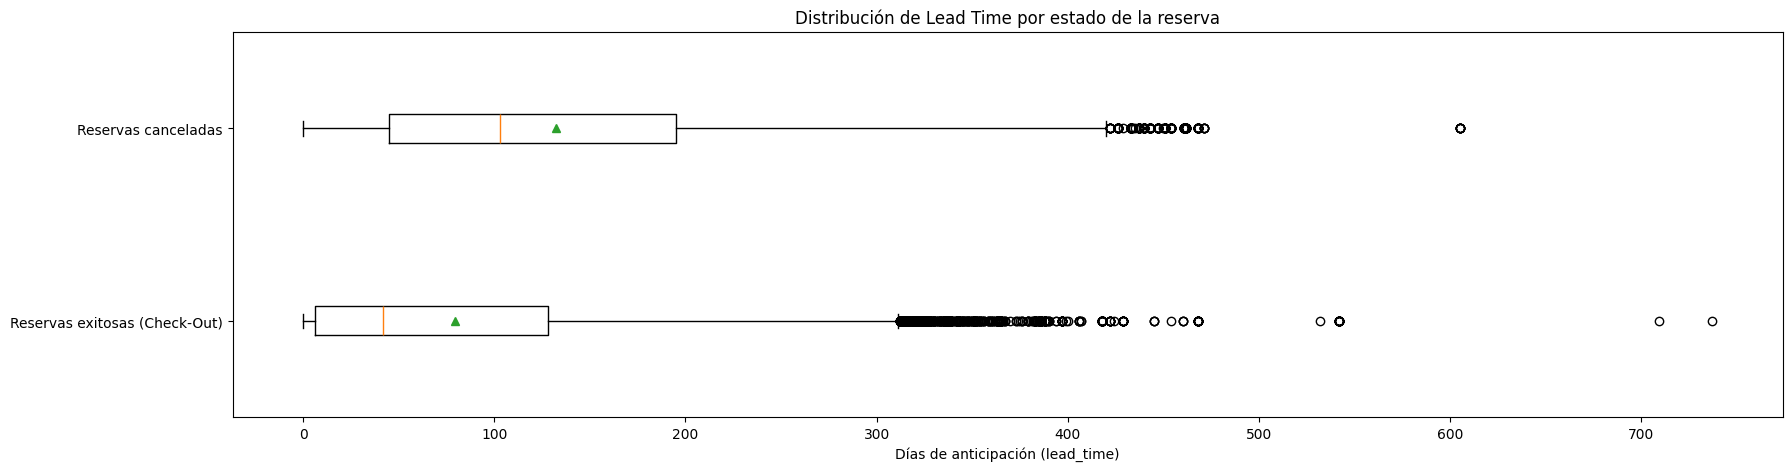

In [246]:

plt.figure(figsize=(20, 5))

# Crear lista con los dos conjuntos de datos
data = [checkout_df["lead_time"], canceled_df["lead_time"]]

# Graficar boxplot
plt.boxplot(data, showmeans=True, vert=False, labels=["Reservas exitosas (Check-Out)", "Reservas canceladas"])

plt.title("Distribución de Lead Time por estado de la reserva")
plt.xlabel("Días de anticipación (lead_time)")
plt.show()


El promedio de dias de antelación con la que un cliente exitoso hace la reserva comparado con un cliente que cancela es menor, es decir, un usuario exitoso en promedio reserva con menos dias de antelacion que el usuario que cancela (75 y 140 dias). Asimismo, el 50% de las reservas del cliente exitoso ocurren entre 20 y 130 dias, mientras que el usuario que cancela esta entre 50 y 200 dias. Existe valores atipicos positivos en ambos casos, lo cual hace que existe una asimetria positiva y arrastra la media hacia la derecha, por encima de la mediana. 

## Analisis Ivan


Estrategia de análisis:

La estrategia inicia con la validación y limpieza de los datos de reservas para garantizar su calidad, eliminando valores duplicados, transformación de tipos de datos (entre otros). Posteriormente se realizará un análisis univariado para entender y describir las distribuciones de las variables seleccionadas, empleando medidas de tendencia central, dispersión y gráficos como histogramas y boxplots. Con lo anterior se busca identificar patrones generales y posibles valores atípicos. 

Luego se avanzará con un análisis bivariado para explorar relaciones entre variables, por ejemplo, la influencia del tipo de hotel, el canal de reservación sobre la probabilidad de cancelación. Se utilizará correlaciones y diagramas de dispersión enriquecidos con color por categorías. Finalmente se propondrán visualizaciones que permitan identificar segmentos de clientes y estrategias de precios que contribuyan a reducir cancelaciones y mejorar la ocupación otelera. 

In [15]:
reservation_df.head(3)
reservation_df["arrival_date_year"].unique()
df_reservation_mod = reservation_df

Se identifican 13.340 valores nulos (valores iguales en todas sus columnas, en el dataset no hay una llave por la cual agrupar).

In [16]:
df_reservation_mod.duplicated().sum()
dups_all = df_reservation_mod[df_reservation_mod.duplicated(keep=False)].sort_values(list(df_reservation_mod.columns))
dups_all.head(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
40772,City Hotel,0,0,2015,August,32,7,0,2,2,...,14,<NA>,0,Transient,75.0,0,1,Check-Out,2015-08-09,NaN
40802,City Hotel,0,0,2015,August,32,7,0,2,2,...,14,<NA>,0,Transient,75.0,0,1,Check-Out,2015-08-09,NaN
40821,City Hotel,0,0,2015,August,32,8,0,1,2,...,9,<NA>,0,Transient,89.0,0,1,Check-Out,2015-08-09,NaN
40838,City Hotel,0,0,2015,August,32,8,0,1,2,...,9,<NA>,0,Transient,89.0,0,1,Check-Out,2015-08-09,NaN


In [17]:
cond = df_reservation_mod["lead_time"] > 0
df_filtrado = df_reservation_mod[cond]
df_filtrado

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,<NA>,<NA>,0,Transient,0.00,0,0,Check-Out,2015-07-01,NaN
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,<NA>,<NA>,0,Transient,0.00,0,0,Check-Out,2015-07-01,NaN
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,<NA>,<NA>,0,Transient,75.00,0,0,Check-Out,2015-07-02,NaN
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,<NA>,0,Transient,75.00,0,0,Check-Out,2015-07-02,NaN
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,<NA>,0,Transient,98.00,0,1,Check-Out,2015-07-03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58890,Resort Hotel,0,3,2016,April,16,11,1,0,1,...,240,<NA>,0,Transient-Party,56.00,0,1,Check-Out,2016-04-12,NaN
58891,Resort Hotel,1,158,2016,May,20,8,2,2,2,...,250,<NA>,0,Transient,83.05,0,1,Canceled,2016-01-21,NaN
58892,City Hotel,1,18,2016,August,32,6,2,2,2,...,9,<NA>,0,Transient,151.00,0,2,Canceled,2016-07-28,NaN
58893,Resort Hotel,1,383,2016,October,41,6,1,3,2,...,315,<NA>,0,Transient-Party,48.00,0,0,Canceled,2016-03-04,NaN


- hotel 
- lead_time (Nos podría dar pistas de si a mayor tiempo mas cancelaciones)
- deposit_type 
- days_in_waiting_list
- reservation_status